In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error

## Gerando os dados

In [2]:
#gerando pseudo-random numbers
#"appear random, but they are really predetermined"
np.random.seed(42)
X = np.sort(np.random.rand(100))
#adicionando números aleatórios para gerar "barulhos"
y = np.cos(1.2* X * np.pi) + (0.1 * np.random.randn(100))

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size = 0.2)

## Plotting data

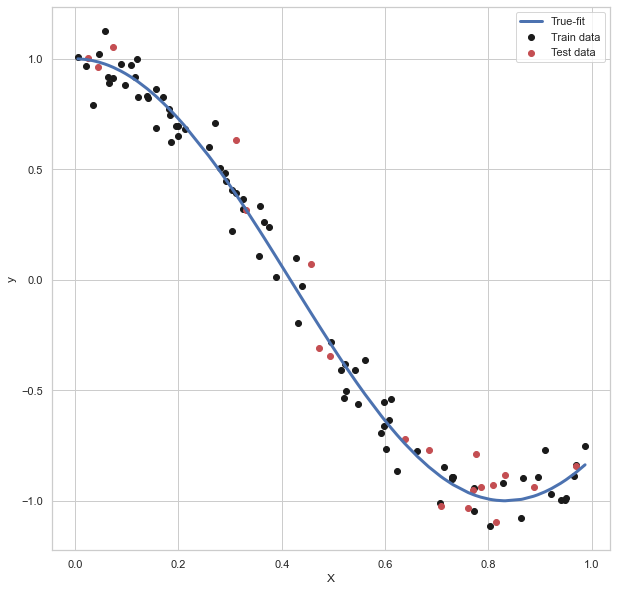

In [5]:
fig = plt.figure(figsize = (10,10))
sns.set(style = 'whitegrid')
plt.scatter(X_train, y_train, color = 'k', label = 'Train data')
plt.scatter(X_test, y_test, color = 'r', label = 'Test data')
plt.plot(X, np.cos(1.2* X * np.pi), linewidth = 3, label = 'True-fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

## Under-fitting or 'High-bias

In [7]:
#Equação do primerio grau
x_train = X_train.reshape(-1,1)
clf = LinearRegression()
clf.fit(x_train, y_train)
train_accuracy = clf.score(x_train, y_train)
print("Train Acuracia: ", train_accuracy)

Train Acuracia:  0.9276025053551601


In [17]:
x_test = X_test.reshape(-1, 1)
test_accuracy = clf.score(x_test, y_test)
print('Test Acuracia', test_accuracy)

Test Acuracia 0.9259414382942455


In [20]:
type(X_test)

numpy.ndarray

In [21]:
type(x_test)

numpy.ndarray

In [24]:
train_predict = clf.predict(x_train)
train_MSE = mean_squared_error(y_train, train_predict)
print('Training MSE:', train_MSE)

Training MSE: 0.040338393489346015


In [25]:
test_predict = clf.predict(x_test)
test_MSE = mean_squared_error(y_test, test_predict)
print('Test MSE:', test_MSE)

Test MSE: 0.04068556089245825


Text(0, 0.5, 'y')

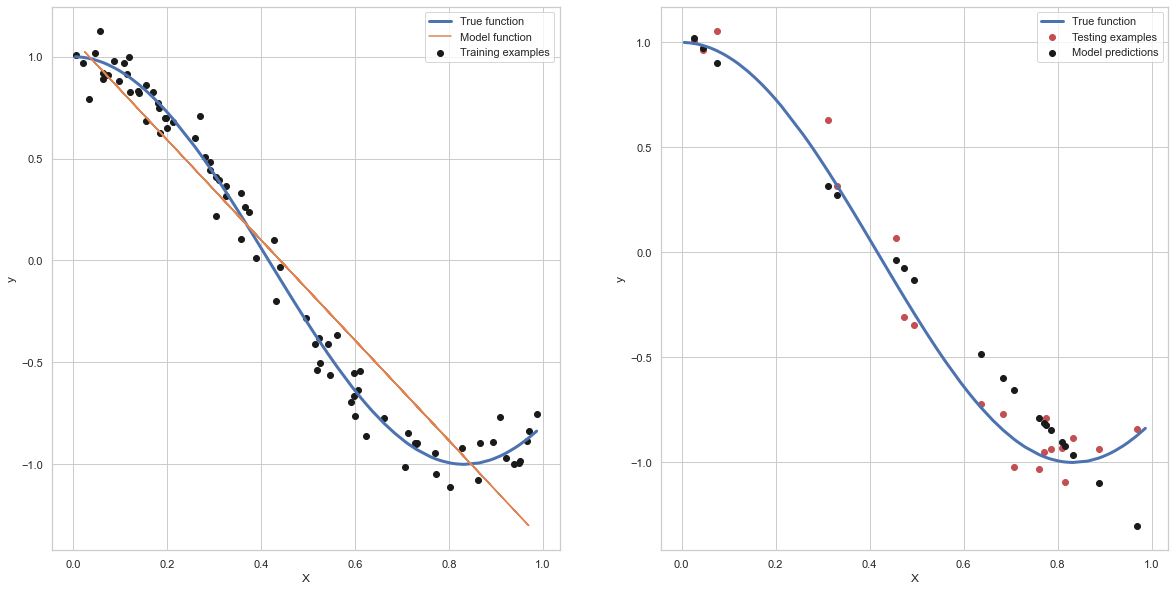

In [29]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.scatter(X_train, y_train, color = 'k', label = 'Training examples')
ax1.plot(X, np.cos(1.2 * X * np.pi), linewidth = 3, label = 'True function')
ax1.plot(X_test, test_predict, label = 'Model function' )
ax1.legend()
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax2.scatter(X_test, y_test, color = 'r', label = 'Testing examples')
ax2.plot(X, np.cos(1.2 * X * np.pi), linewidth = 3, label = 'True function')
ax2.scatter(X_test, test_predict,color = 'k', label = 'Model predictions')
plt.legend()
ax2.set_xlabel('X')
ax2.set_ylabel('y')

+ The model is under-fit as it is not able to fit the training examples correctly.
+ The training and testing error are also quite high.
+ Increasing the degree of the equation may do the job.

In [31]:
#Equação do segundo grau
x_train = X_train.reshape(-1,1)
transf = preprocessing.PolynomialFeatures()
x_train = transf.fit_transform(x_train)
clf = LinearRegression()
clf.fit(x_train, y_train)
train_accuracy = clf.score(x_train, y_train)
print('Train accuracy:', train_accuracy)

Train accuracy: 0.9541558552139953


In [35]:
x_test = X_test.reshape(-1,1)
transf = preprocessing.PolynomialFeatures()
x_test = transf.fit_transform(x_test)
test_accuracy = clf.score(x_test, y_test)
print('test accuracy', test_accuracy)

test accuracy 0.9421659027644553


In [37]:
train_predict = clf.predict(x_train)
train_MSE = mean_squared_error(y_train, train_predict)
print('Training MSE:', train_MSE)

Training MSE: 0.02554341363098831


In [39]:
test_predict = clf.predict(x_test)
test_MSE = mean_squared_error(y_test, test_predict)
print('Test MSE:', test_MSE)

Test MSE: 0.03177232490803649


In [41]:
x_model = X.reshape(-1,1)
x_model = transf.fit_transform(x_model)
y_model = clf.predict(x_model)
x_test = X_test

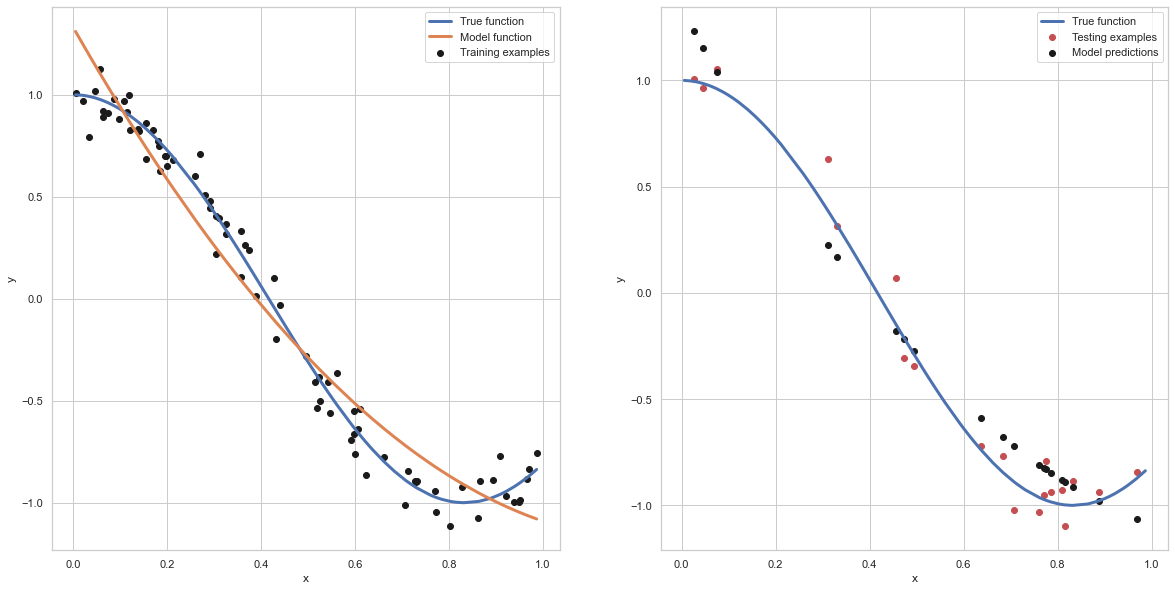

In [45]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.scatter(X_train, y_train, color = 'k', label = 'Training examples')
ax1.plot(X, np.cos(1.2 * X * np.pi), linewidth = 3, label = 'True function')
ax1.plot(X, y_model, label = 'Model function', linewidth = 3 )
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2.scatter(X_test, y_test, color = 'r', label = 'Testing examples')
ax2.plot(X, np.cos(1.2 * X * np.pi), linewidth = 3, label = 'True function')
ax2.scatter(X_test, test_predict,color = 'k', label = 'Model predictions')
plt.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()

## Overfitting or High-Variance

Overfitting can also occur if we have too many features, which is what happens indirectly when we increase the degree of the function. The learned hypothesis may fit the training set very well( to an extent that the value of cost will be zero), but fail to predict on new examples.

In [46]:
#equação de grau 20
x_train = X_train.reshape(-1,1)
transf = preprocessing.PolynomialFeatures(degree = 20)
x_train = transf.fit_transform(x_train)
clf = LinearRegression()
clf.fit(x_train, y_train)
train_accuracy = clf.score(x_train, y_train)
print('Train accuracy:', train_accuracy)

Train accuracy: 0.9893524210971585


In [48]:
x_test = X_test.reshape(-1,1)
transf = preprocessing.PolynomialFeatures(degree = 20)
x_test = transf.fit_transform(x_test)
test_accuracy = clf.score(x_test, y_test)
print('test accuracy', test_accuracy)

test accuracy 0.9745703075178287


In [49]:
train_predict = clf.predict(x_train)
train_MSE = mean_squared_error(y_train, train_predict)
print('Training MSE:', train_MSE)

Training MSE: 0.005932611751258881


In [50]:
test_predict = clf.predict(x_test)
test_MSE = mean_squared_error(y_test, test_predict)
print('Test MSE:', test_MSE)

Test MSE: 0.013970313197150266


In [52]:
x_model = X.reshape(-1,1)
x_model = transf.fit_transform(x_model)
y_model = clf.predict(x_model)
x_test = X_test

Text(0, 0.5, 'y')

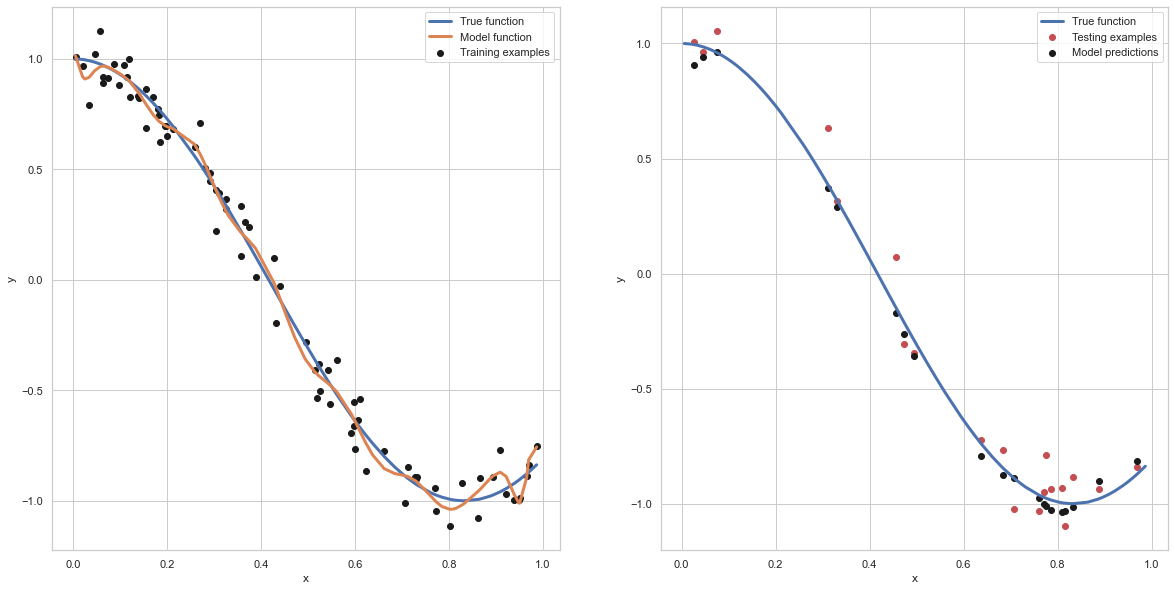

In [53]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.scatter(X_train, y_train, color = 'k', label = 'Training examples')
ax1.plot(X, np.cos(1.2 * X * np.pi), linewidth = 3, label = 'True function')
ax1.plot(X, y_model, label = 'Model function', linewidth = 3 )
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2.scatter(X_test, y_test, color = 'r', label = 'Testing examples')
ax2.plot(X, np.cos(1.2 * X * np.pi), linewidth = 3, label = 'True function')
ax2.scatter(X_test, test_predict,color = 'k', label = 'Model predictions')
plt.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('y')

+ The model function is very much distorted as its degree is high which makes it flexible enough to try to pass thorugh all the training examples.
+ As the training data has some amount of noise, it will end up capturing that noise and will be misled by that noise when it tries to make predictions on the test data.
+ The optimum model would be the one fitting the data without under-fitting or over-fitting it.


## Checking MSE for different degrees

In [58]:
def Evaluation(degree):
    x_train = X_train.reshape(-1,1)
    transf = preprocessing.PolynomialFeatures(degree = degree)
    x_train = transf.fit_transform(x_train)
    clf = LinearRegression()
    clf.fit(x_train, y_train)
    train_accuracy = clf.score(x_train, y_train)
    x_test = X_test.reshape(-1,1)
    transf = preprocessing.PolynomialFeatures(degree = degree)
    x_test = transf.fit_transform(x_test)
    test_accuracy = clf.score(x_test, y_test)
    train_predict = clf.predict(x_train)
    train_MSE = mean_squared_error(y_train, train_predict)
    test_predict = clf.predict(x_test)
    test_MSE = mean_squared_error(y_test, test_predict)
    return train_accuracy, test_accuracy, train_MSE, test_MSE

In [59]:
Train_acc = []
Test_acc = []
Train_MSE = []
Test_MSE = []


for i in range(40):
    a, b, c, d = Evaluation(i+1)
    Train_acc.append(a)
    Test_acc.append(b)
    Train_MSE.append(c)
    Test_MSE.append(d)

Text(0, 0.5, 'MSE')

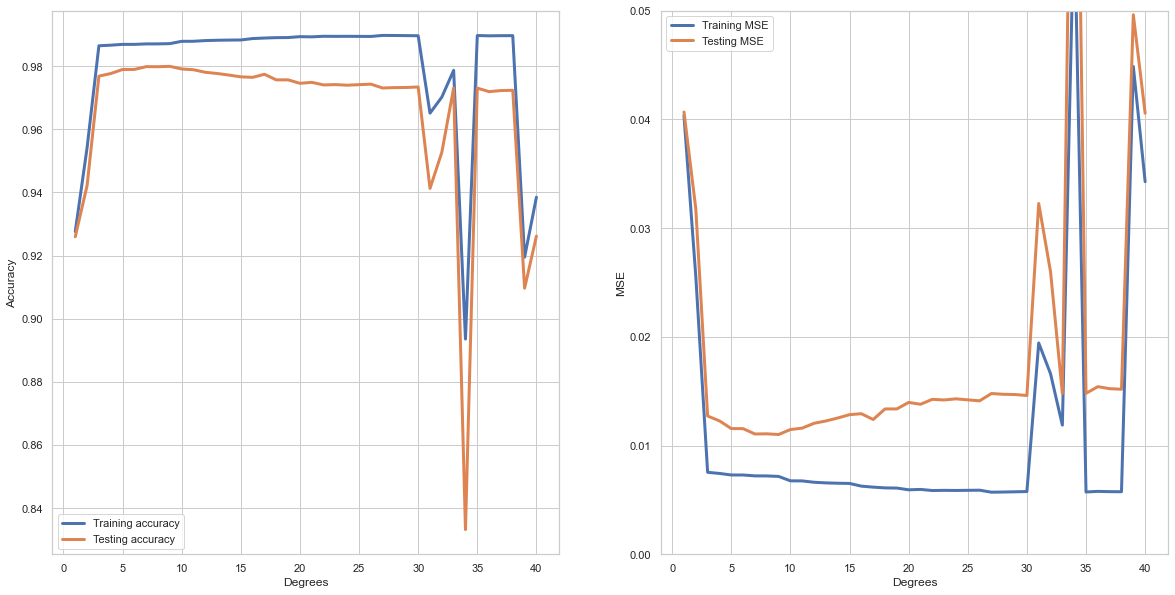

In [60]:
degrees = np.linspace(1, 40, 40)
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(degrees, Train_acc, label = 'Training accuracy', linewidth = 3)
ax1.plot(degrees, Test_acc, label = 'Testing accuracy', linewidth = 3)
ax1.legend()
ax1.set_xlabel('Degrees')
ax1.set_ylabel('Accuracy')
ax2.plot(degrees, Train_MSE, label = 'Training MSE', linewidth = 3)
ax2.plot(degrees, Test_MSE, label = 'Testing MSE', linewidth = 3)
plt.ylim(0, 0.05)
plt.legend()
ax2.set_xlabel('Degrees')
ax2.set_ylabel('MSE')

In [62]:
Test_min_degree = Test_MSE.index(min(Test_MSE)) + 1
print('Minimum test error occurs at degree', Test_min_degree )
Train_min_degree = Train_MSE.index(min(Train_MSE)) + 1
print('Minimum training error occurs at degree', Train_min_degree )

Minimum test error occurs at degree 9
Minimum training error occurs at degree 27


+ We could find that the model has least testing error at degree 9 and least training error at degree 27.
+ The testing error rises after degree 9 as the model begins to overfit and it cannot predict the test values correctly.

In [63]:
#Equação do nono grau
x_train = X_train.reshape(-1,1)
transf = preprocessing.PolynomialFeatures(degree = 9)
x_train = transf.fit_transform(x_train)
clf = LinearRegression()
clf.fit(x_train, y_train)
train_accuracy = clf.score(x_train, y_train)

x_test = X_test.reshape(-1,1)
transf = preprocessing.PolynomialFeatures(degree = 9)
x_test = transf.fit_transform(x_test)
test_accuracy = clf.score(x_test, y_test)

print('Train accuracy: ', train_accuracy)
print('Test accuracy: ', test_accuracy)

Train accuracy:  0.9871428647031711
Test accuracy:  0.9799446482491438


In [65]:
train_predict = clf.predict(x_train)
train_MSE = mean_squared_error(y_train, train_predict)

test_predict = clf.predict(x_test)
test_MSE = mean_squared_error(y_test, test_predict)

print('Training MSE:', train_MSE)
print('Test MSE:', test_MSE)

Training MSE: 0.007163731083423698
Test MSE: 0.011017810987486717


In [67]:
x_model = X.reshape(-1,1)
x_model = transf.fit_transform(x_model)
y_model = clf.predict(x_model)
x_test = X_test

Text(0, 0.5, 'MSE')

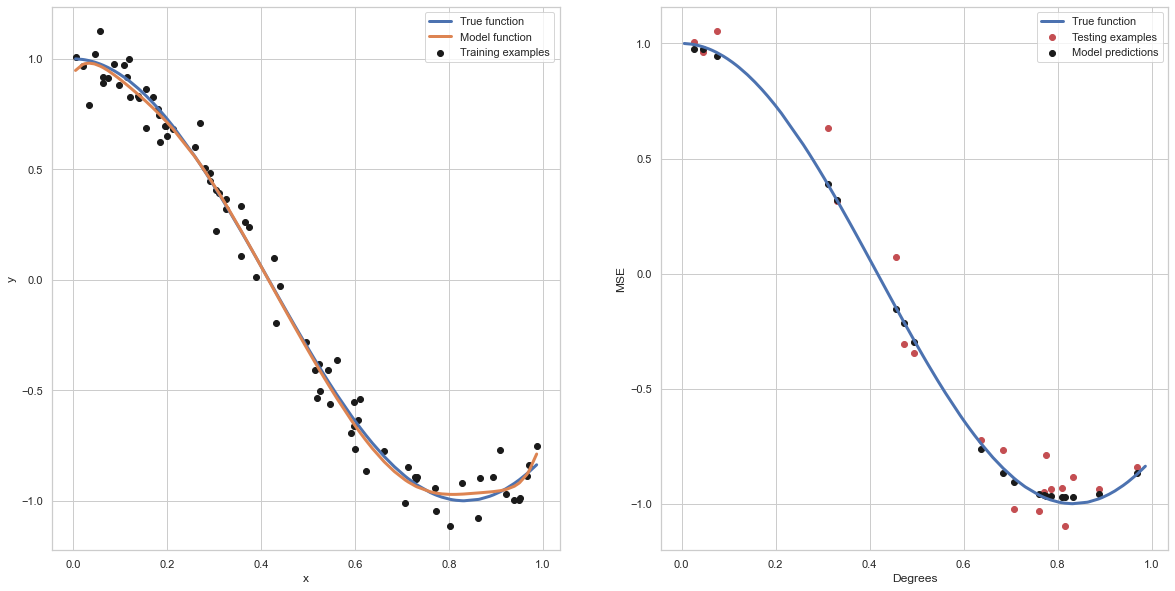

In [68]:

fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.scatter(X_train, y_train, color = 'k', label = 'Training examples')
ax1.plot(X, np.cos(1.2 * X * np.pi), linewidth = 3, label = 'True function')
ax1.plot(X, y_model, label = 'Model function', linewidth = 3 )
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2.scatter(X_test, y_test, color = 'r', label = 'Testing examples')
ax2.plot(X, np.cos(1.2 * X * np.pi), linewidth = 3, label = 'True function')
ax2.scatter(X_test, test_predict,color = 'k', label = 'Model predictions')
plt.legend()
ax2.set_xlabel('Degrees')
ax2.set_ylabel('MSE')

## Regularization to prevent over-fitting

In [80]:
# Ridge regression
def ridge_reg(lamda):
    x_train = X_train.reshape(-1,1)
    transf = preprocessing.PolynomialFeatures(degree = 20)
    x_train = transf.fit_transform(x_train)
    
    clf = Ridge(alpha = lamda)
    clf.fit(x_train, y_train)
    
    train_accuracy = clf.score(x_train, y_train)
    intercept = clf.intercept_
    coefficient = clf.coef_
    parameters = coefficient + intercept
    
    x_test = X_test.reshape(-1,1)
    transf = preprocessing.PolynomialFeatures(degree = 20)
    x_test = transf.fit_transform(x_test)
    
    test_accuracy = clf.score(x_test, y_test)
    train_predict = clf.predict(x_train)
    
    train_MSE = mean_squared_error(y_train, train_predict)
    test_predict = clf.predict(x_test)
    test_MSE = mean_squared_error(y_test, test_predict)
    print('Train accuracy:', train_accuracy, '\n')
    print('Test accuracy:', test_accuracy, '\n')
    print('Train MSE', train_MSE, '\n')
    print('Test MSE', test_MSE, '\n')
    print('Parameters:', parameters)
    x_model = X.reshape(-1,1)
    x_model = transf.fit_transform(x_model)
    y_model = clf.predict(x_model)
    x_test = X_test
    fig = plt.figure(figsize = (20,10))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax1.scatter(X_train, y_train, color = 'k', label = 'Training examples')
    ax1.plot(X, np.cos(1.2 * X * np.pi), linewidth = 3, label = 'True function')
    ax1.plot(X, y_model, label = 'Model function', linewidth = 3 )
    ax1.legend()
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax2.scatter(X_test, y_test, color = 'r', label = 'Testing examples')
    ax2.plot(X, np.cos(1.2 * X * np.pi), linewidth = 3, label = 'True function')
    ax2.scatter(X_test, test_predict,color = 'k', label = 'Model predictions')
    plt.legend()
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')

Train accuracy: 0.9893497127273313 

Test accuracy: 0.9745585384460297 

Train MSE 0.005934120799166422 

Test MSE 0.013976778773530549 

Parameters: [ 1.01011450e+00  9.83119543e+00 -2.02979091e+03  1.16587064e+05
 -3.35342635e+06  5.87625523e+07 -6.89088088e+08  5.71104103e+09
 -3.46668943e+10  1.57972635e+11 -5.49726293e+11  1.47734582e+12
 -3.08485195e+12  5.01061457e+12 -6.30389008e+12  6.07739879e+12
 -4.40242747e+12  2.31759540e+12 -8.36693018e+11  1.85198151e+11
 -1.89471320e+10]


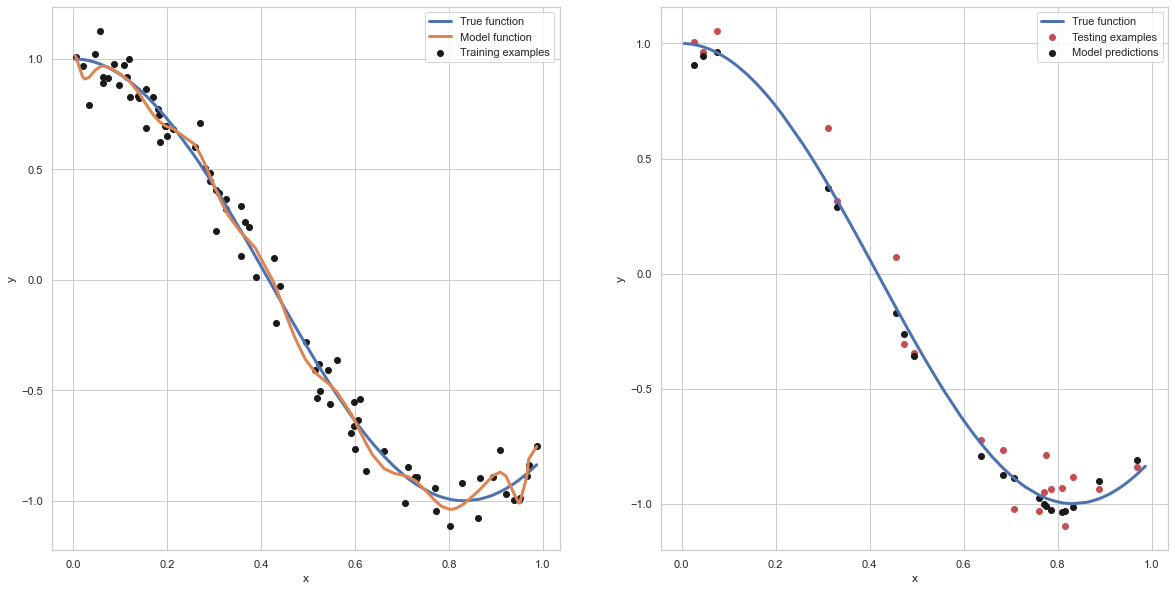

In [81]:
ridge_reg(0)

Train accuracy: 0.9684920881582759 

Test accuracy: 0.9632905358813 

Train MSE 0.017555559790212706 

Test MSE 0.020167082688763972 

Parameters: [ 1.00326713 -0.73624115 -0.03962705  0.57482941  0.93823368  1.12745805
  1.21347712  1.24142628  1.2378669   1.21806874  1.19071923  1.16070776
  1.13073363  1.10223139  1.07590565  1.05204177  1.03068769  1.01176065
  0.99510999  0.98055406  0.96790156]


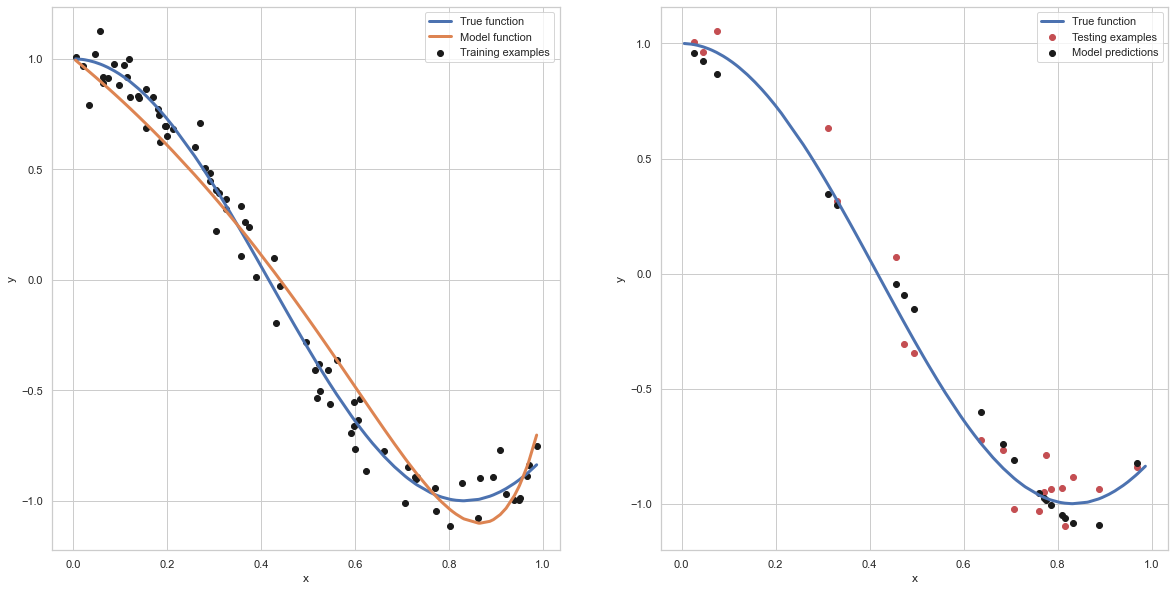

In [82]:
ridge_reg(0.5)

Train accuracy: 0.9513849607530571 

Test accuracy: 0.951708460474526 

Train MSE 0.027087298977174674 

Test MSE 0.026529928838755195 

Parameters: [ 0.92109539 -0.58333661 -0.01689017  0.47435504  0.77378436  0.9411108
  1.02885765  1.07024194  1.08500439  1.08473263  1.07623117  1.06350536
  1.048912    1.03382865  1.01904633  1.00500242  0.9919205   0.97989506
  0.96894337  0.95903748  0.9501241 ]


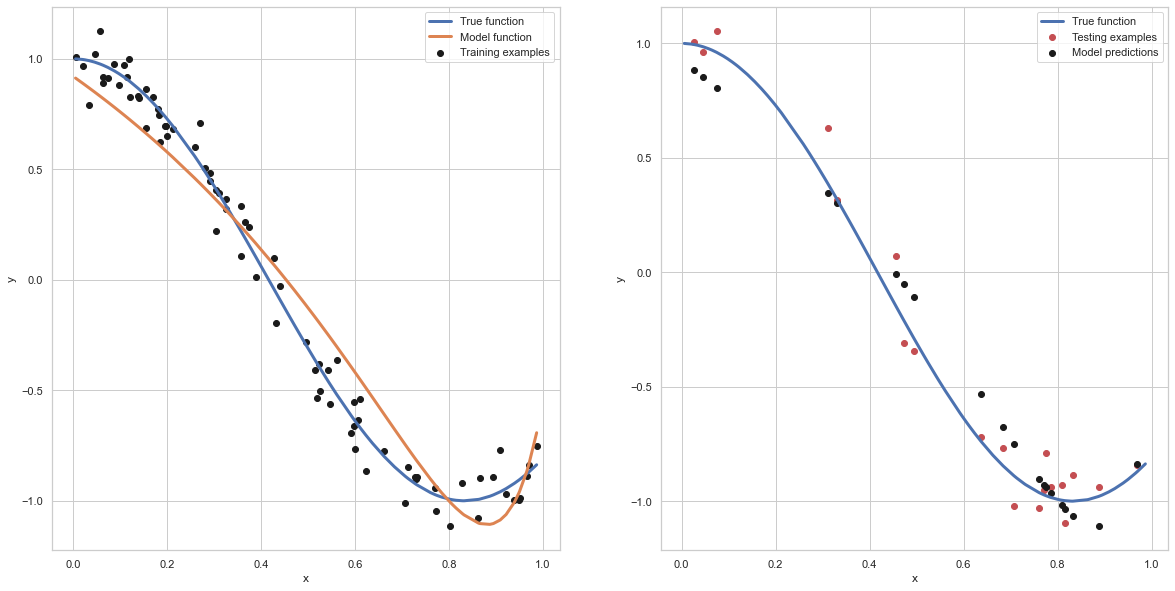

In [83]:
ridge_reg(1)

Train accuracy: 0.7343248781809439 

Test accuracy: 0.6897253416462502 

Train MSE 0.148028708131972 

Test MSE 0.17045562612995319 

Parameters: [ 0.51318215 -0.09690755  0.05169525  0.20537491  0.31341956  0.38590061
  0.43468181  0.4679856   0.49108785  0.50734909  0.51893478  0.52726496
  0.53328883  0.53765307  0.54080627  0.54306498  0.54465599  0.54574412
  0.54645065  0.54686586  0.54705762]


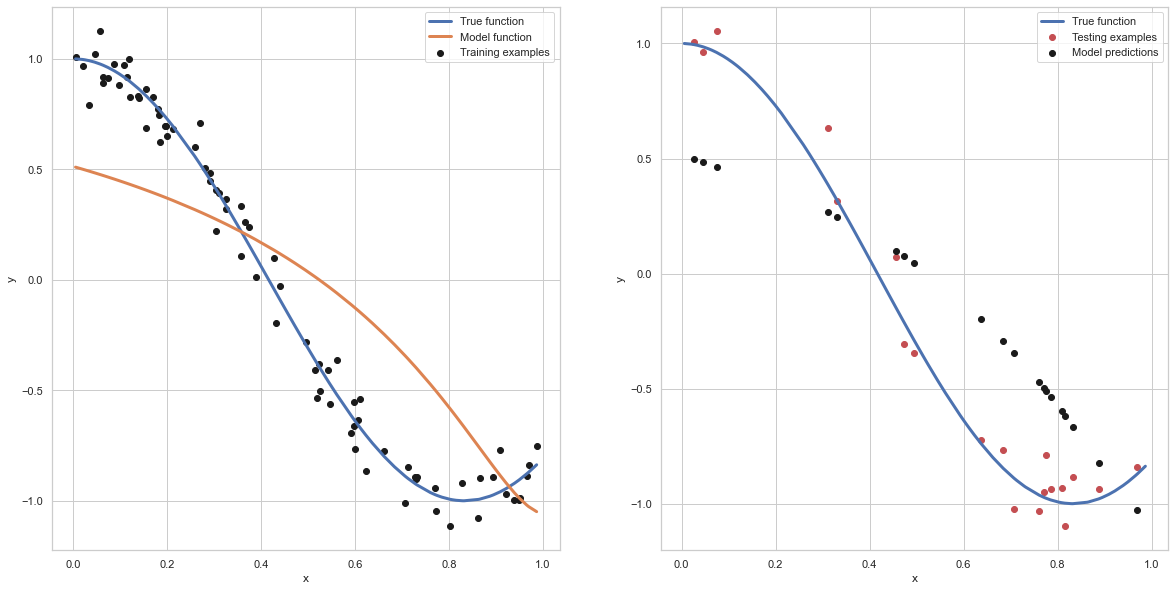

In [84]:
ridge_reg(10)

Train accuracy: 0.32752724035086245 

Test accuracy: 0.11953331538082523 

Train MSE 0.3746879767410118 

Test MSE 0.48370208772324536 

Parameters: [0.15639088 0.02835291 0.04313573 0.06531041 0.08282949 0.09578516
 0.10540694 0.11269745 0.11835116 0.1228354  0.12646613 0.1294603
 0.13196977 0.13410296 0.13593884 0.13753597 0.13893856 0.14018051
 0.14128821 0.1422825  0.14318001]


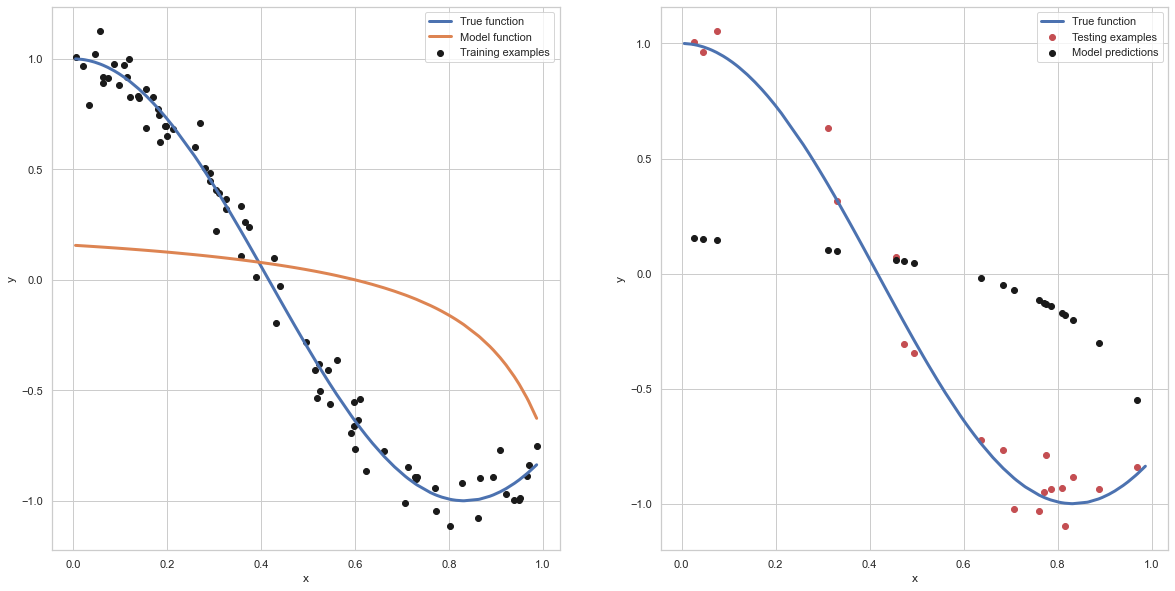

In [85]:
ridge_reg(100)

Train accuracy: 0.05566901988821882 

Test accuracy: -0.19412765840832158 

Train MSE 0.5261617801389462 

Test MSE 0.6560180543685237 

Parameters: [0.02019324 0.00397582 0.00514365 0.00750171 0.00947175 0.01098638
 0.01215111 0.01306343 0.01379391 0.01439135 0.01488943 0.01531169
 0.01567491 0.01599127 0.01626979 0.01651727 0.01673892 0.01693881
 0.01712017 0.01728557 0.01743712]


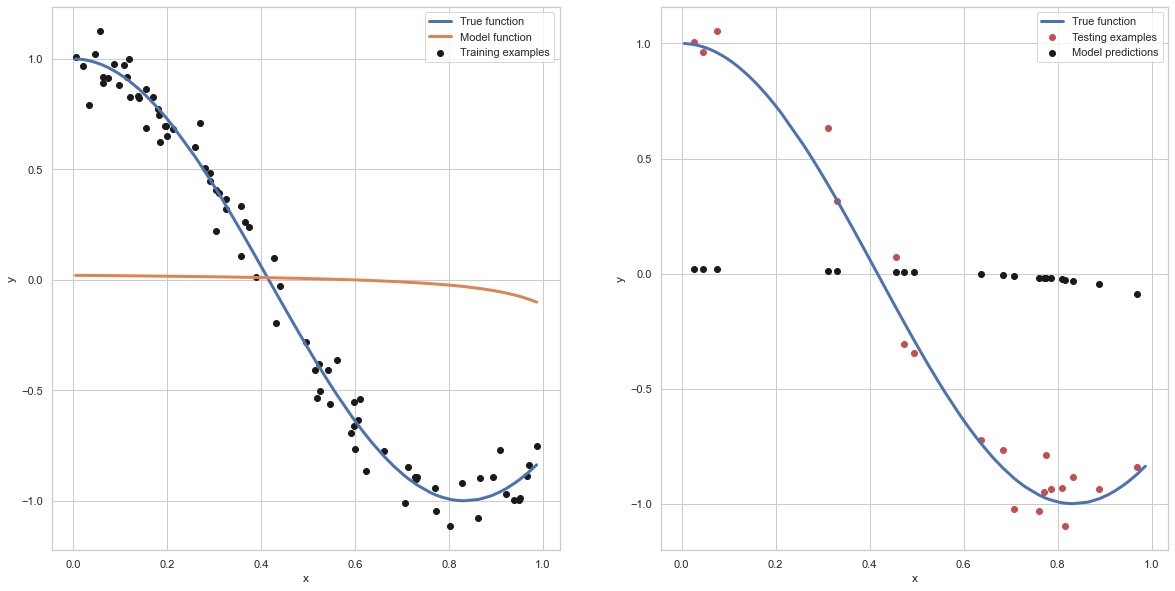

In [86]:
ridge_reg(1000)

In [87]:
# Lasso
def lasso_reg(lamda):
    x_train = X_train.reshape(-1,1)
    transf = preprocessing.PolynomialFeatures(degree = 20)
    x_train = transf.fit_transform(x_train)
    
    clf = Lasso(alpha = lamda)
    clf.fit(x_train, y_train)
    
    intercept = clf.intercept_
    coefficient = clf.coef_
    parameters = coefficient + intercept
    train_accuracy = clf.score(x_train, y_train)
    
    x_test = X_test.reshape(-1,1)
    transf = preprocessing.PolynomialFeatures(degree = 20)
    x_test = transf.fit_transform(x_test)
    
    test_accuracy = clf.score(x_test, y_test)
    train_predict = clf.predict(x_train)
    train_MSE = mean_squared_error(y_train, train_predict)
    test_predict = clf.predict(x_test)
    test_MSE = mean_squared_error(y_test, test_predict)
    
    print('Train accuracy:', train_accuracy, '\n')
    print('Test accuracy:', test_accuracy, '\n')
    print('Train MSE', train_MSE, '\n')
    print('Test MSE', test_MSE, '\n')
    print('Parameters:', parameters)
    x_model = X.reshape(-1,1)
    x_model = transf.fit_transform(x_model)
    y_model = clf.predict(x_model)
    x_test = X_test
    fig = plt.figure(figsize = (20,10))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax1.scatter(X_train, y_train, color = 'k', label = 'Training examples')
    ax1.plot(X, np.cos(1.2 * X * np.pi), linewidth = 3, label = 'True function')
    ax1.plot(X, y_model, label = 'Model function', linewidth = 3 )
    ax1.legend()
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax2.scatter(X_test, y_test, color = 'r', label = 'Testing examples')
    ax2.plot(X, np.cos(1.2 * X * np.pi), linewidth = 3, label = 'True function')
    ax2.scatter(X_test, test_predict,color = 'k', label = 'Model predictions')
    plt.legend()
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')

Train accuracy: 0.7174573263035269 

Test accuracy: 0.6399908396339367 

Train MSE 0.15742696076724744 

Test MSE 0.19777827544250176 

Parameters: [ 0.56772136 -0.72139651  0.56772136  0.56772136  0.56772136  0.56772136
  0.56772136  0.56772136  0.56772136  0.56772136  0.56772136  0.56772136
  0.56772136  0.56772136  0.56772136  0.56772136  0.56772136  0.56772136
  0.56772136  0.56772136  0.56772136]


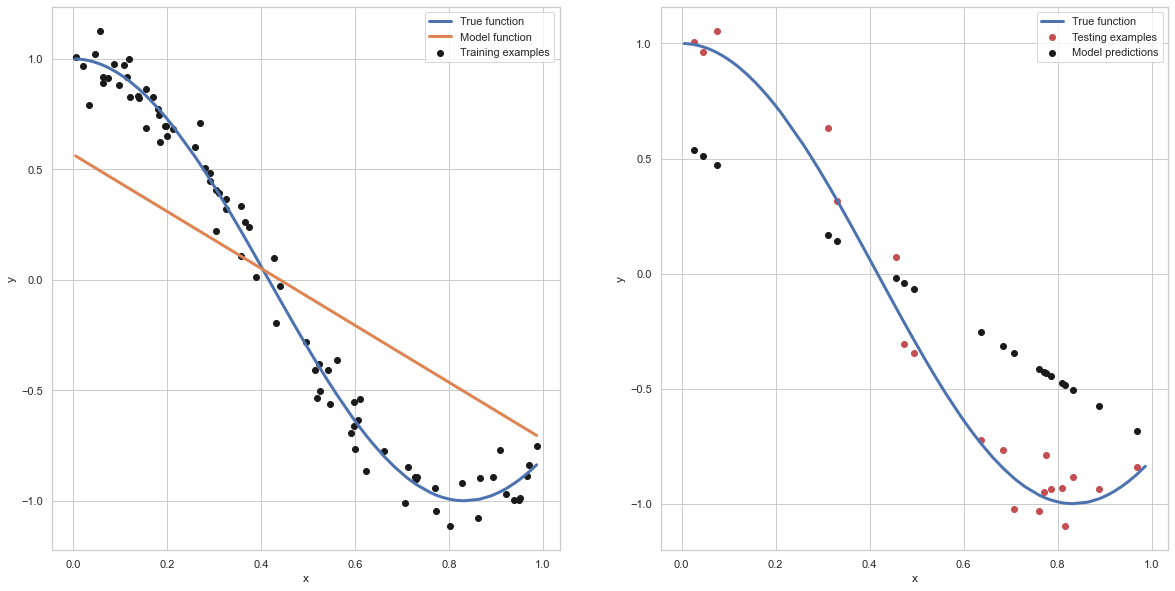

In [88]:
lasso_reg(0.1)

Train accuracy: 0.9539720220207865 

Test accuracy: 0.9496732416520269 

Train MSE 0.025645841701468376 

Test MSE 0.027648017246429825 

Parameters: [ 1.08642937 -1.45760897  1.08642937  1.08642937  1.08642937  1.08642937
  1.08642937  1.08642937  1.08642937  1.50375889  1.08642937  1.08642937
  1.08642937  1.08642937  1.08642937  1.08642937  1.08642937  1.08642937
  1.08642937  1.08642937  1.08642937]


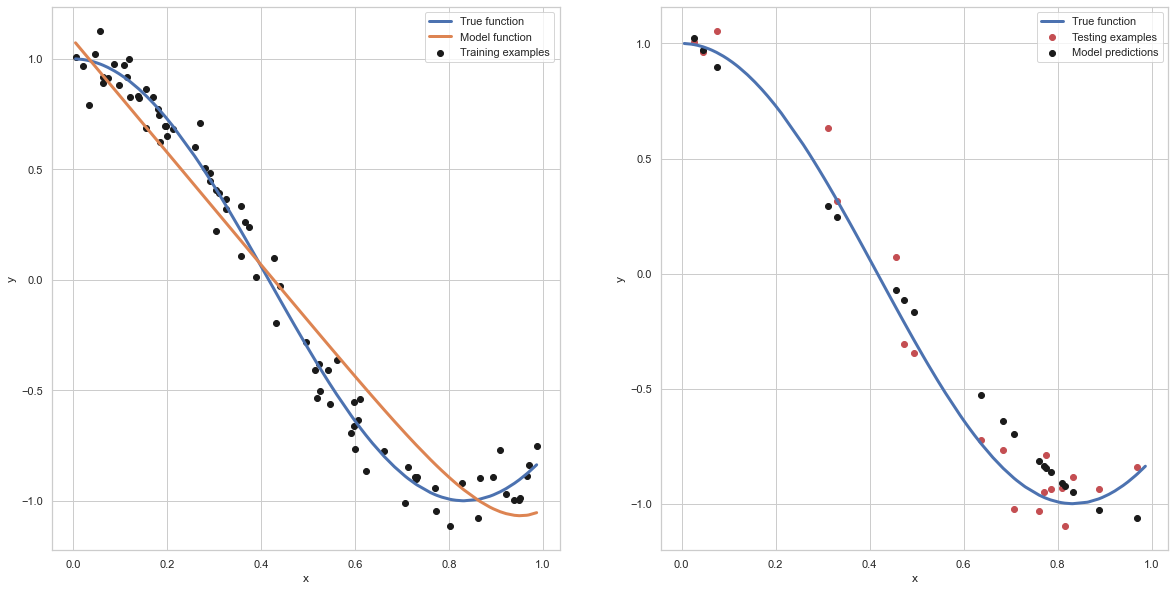

In [89]:
lasso_reg(0.01)

Train accuracy: 0.980329537107391 

Test accuracy: 0.971525880509632 

Train MSE 0.010959976946331992 

Test MSE 0.01564283042637709 

Parameters: [ 1.15209052 -1.17542891  0.05743092  1.15209052  1.15209052  1.15209052
  2.31008147  1.55700984  1.15209052  1.15209052  1.15209052  1.15209052
  1.15209052  1.15209052  1.15209052  1.15209052  1.15209052  1.15209052
  1.15209052  1.15209052  1.15209052]


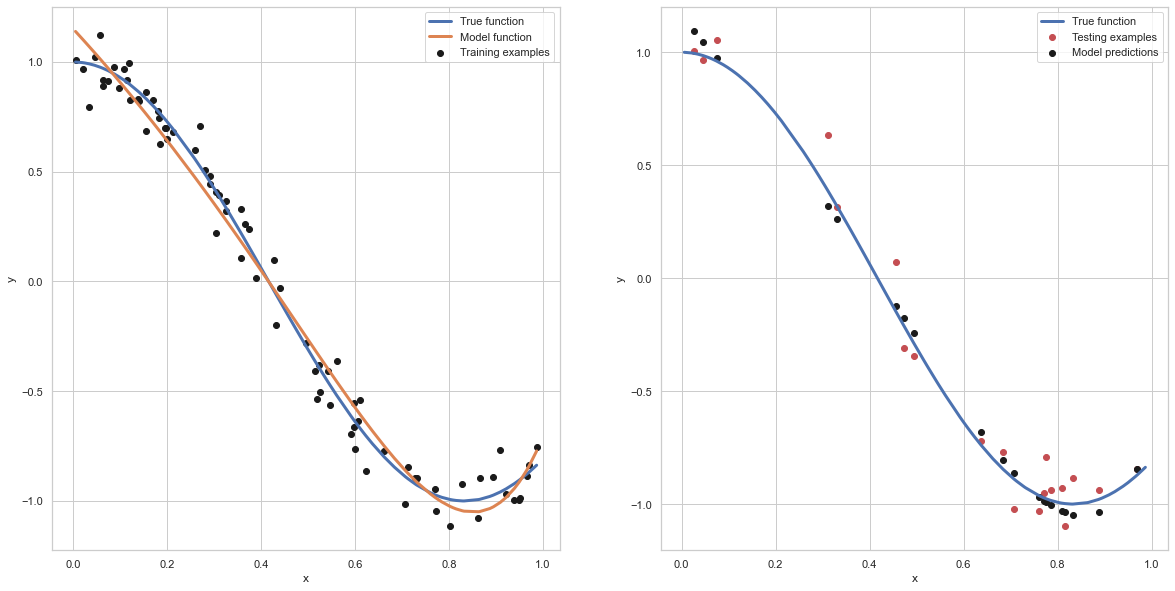

In [90]:
lasso_reg(0.001)

Train accuracy: 0.9828493439420898 

Test accuracy: 0.9730599729321096 

Train MSE 0.009555992456069438 

Test MSE 0.014800045888954408 

Parameters: [ 1.11252636 -0.73922815 -0.94186417  1.11252636  1.11252636  2.61471789
  1.71866187  1.11252636  1.11252636  1.11252636  1.11252636  1.11252636
  1.11252636  1.11252636  1.11252636  1.11252636  1.11252636  1.11252636
  1.11252636  1.11252636  1.0940682 ]


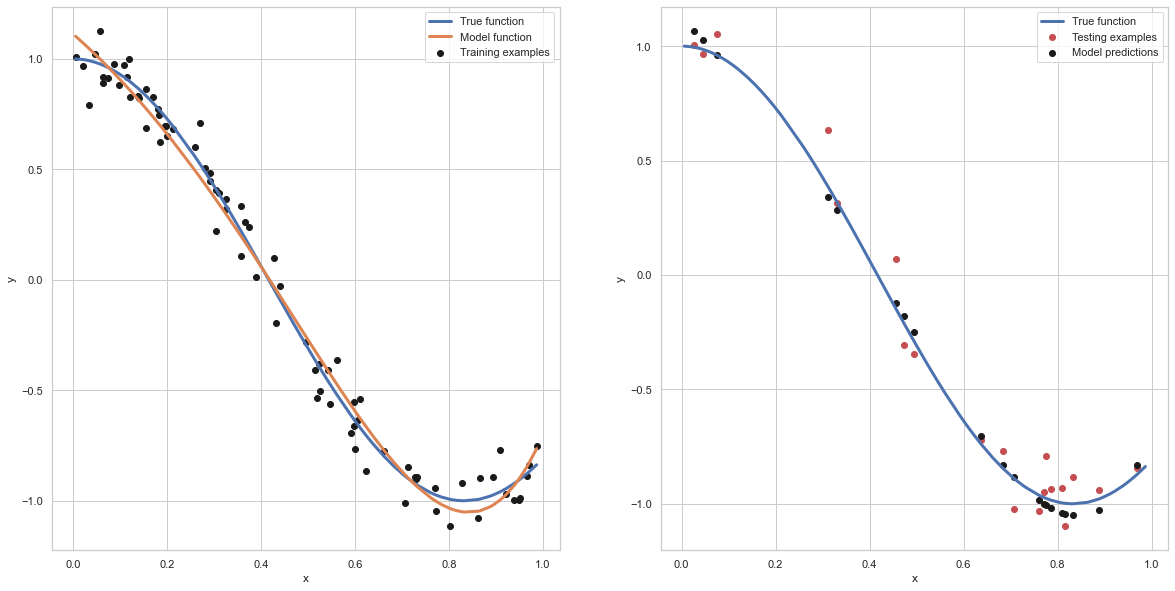

In [91]:
lasso_reg(0.0005)

Train accuracy: 0.0 

Test accuracy: -0.254269243536283 

Train MSE 0.5571794119013908 

Test MSE 0.6890580441757048 

Parameters: [-0.00227563 -0.00227563 -0.00227563 -0.00227563 -0.00227563 -0.00227563
 -0.00227563 -0.00227563 -0.00227563 -0.00227563 -0.00227563 -0.00227563
 -0.00227563 -0.00227563 -0.00227563 -0.00227563 -0.00227563 -0.00227563
 -0.00227563 -0.00227563 -0.00227563]


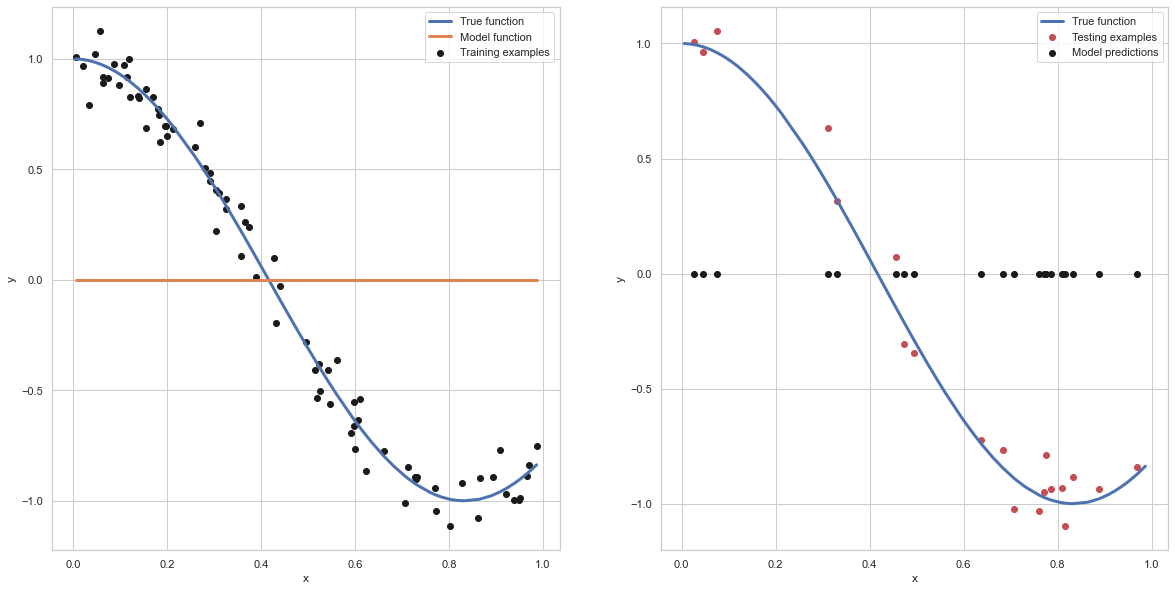

In [92]:

lasso_reg(1)

# Ridge regression with Cross-Validation